## Observations and Insights 

In [3]:
#Downloading scipy package 
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "Resources/Pymaceuticals_Mouse_Metadata.csv"
study_results_path = "Resources/Pymaceuticals_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Preview data to find out which column you will be using to merge
print(mouse_metadata.head())
print(study_results.head())



  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


In [3]:
# Combine the data into a single dataset
mergedlab_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(mergedlab_df.shape)
mergedlab_df.head()

(1893, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
len(mergedlab_df['Mouse ID'].unique())

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Adding column that marks rows as duplicate
mergedlab_df["is_duplicate"]= mergedlab_df.duplicated()

#previewing new df 
mergedlab_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,is_duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
#I wasn't sure if you were refering to the actual row with all columns or all data.
# Below is the actual row that is a duplicate
mergedlab_dups_df = mergedlab_df[(mergedlab_df.is_duplicate == True)]

mergedlab_dups_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,is_duplicate
909,g989,Propriva,Female,21,26,0,45.0,0,True


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
#I wasn't sure if you were refering to the actual row with all columns or all data.
# Below is all of the rows associated with that paricular mouse
mergedlab_dups2_df = mergedlab_df[mergedlab_df['Mouse ID'] == 'g989']

mergedlab_dups2_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,is_duplicate
908,g989,Propriva,Female,21,26,0,45.000000,0,False
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,False
911,g989,Propriva,Female,21,26,5,47.570392,0,False
912,g989,Propriva,Female,21,26,10,51.745156,0,False
913,g989,Propriva,Female,21,26,10,49.880528,0,False
914,g989,Propriva,Female,21,26,15,51.325852,1,False
915,g989,Propriva,Female,21,26,15,53.442020,0,False
916,g989,Propriva,Female,21,26,20,55.326122,1,False
917,g989,Propriva,Female,21,26,20,54.657650,1,False


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its Index number.

#getting list of indexes for all rows associated with mouse
indexes_of_dup_mouse = mergedlab_df[mergedlab_df['Mouse ID'] == 'g989'].index

#passing in list of indexes to drop
mergedlab_df.drop(indexes_of_dup_mouse, inplace=True)

#Also dropping the is_duplicate column as it is not needed at this point 
mergedlab_df.drop('is_duplicate', axis=1, inplace=True)


mergedlab_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame. The number of mice should still 
len(mergedlab_df['Mouse ID'].unique())

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

agg_stats = mergedlab_df[['Drug Regimen', 
                          'Tumor Volume (mm3)']].groupby('Drug Regimen').agg(['mean','median','var','std','sem'])

# This method produces everything in a single groupby function
agg_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [11]:
 # grouping data to get get smaller df by time point and drug regimen
lab_bar_df = mergedlab_df[['Timepoint','Drug Regimen',
                           'Mouse ID']].groupby(['Timepoint','Drug Regimen']).count()


# #Changing the index from gender to number
lab_bar_df.reset_index(drop=False, inplace=True)


lab_bar_df

,Timepoint,Drug Regimen,Mouse ID
0,0,Capomulin,25
1,0,Ceftamin,25
2,0,Infubinol,25
3,0,Ketapril,25
4,0,Naftisol,25
...,...,...,...
95,45,Placebo,11
96,45,Propriva,7
97,45,Ramicane,20
98,45,Stelasyn,11


In [12]:
#Creating data for bar charts by drug regimen

#list of drugs
drug_list = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
             'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

#Getting data for each drug (filtering by drug name)
cap_df = lab_bar_df[lab_bar_df['Drug Regimen'] == 'Capomulin']
cef_df = lab_bar_df[lab_bar_df['Drug Regimen'] == 'Ceftamin']
inf_df = lab_bar_df[lab_bar_df['Drug Regimen'] == 'Infubinol']
ket_df = lab_bar_df[lab_bar_df['Drug Regimen'] == 'Ketapril']
naf_df = lab_bar_df[lab_bar_df['Drug Regimen'] == 'Naftisol']
pla_df = lab_bar_df[lab_bar_df['Drug Regimen'] == 'Placebo']
pro_df = lab_bar_df[lab_bar_df['Drug Regimen'] == 'Propriva']
ram_df = lab_bar_df[lab_bar_df['Drug Regimen'] == 'Ramicane']
ste_df = lab_bar_df[lab_bar_df['Drug Regimen'] == 'Stelasyn']
zon_df = lab_bar_df[lab_bar_df['Drug Regimen'] == 'Zoniferol']


#creating data for each drug into a list 
cap_data = list(cap_df['Mouse ID'])
cef_data = list(cef_df['Mouse ID'])
inf_data = list(inf_df['Mouse ID'])
ket_data = list(ket_df['Mouse ID'])
naf_data = list(naf_df['Mouse ID'])
pla_data = list(pla_df['Mouse ID'])
pro_data = list(pro_df['Mouse ID'])
ram_data = list(ram_df['Mouse ID'])
ste_data = list(ste_df['Mouse ID'])
zon_data = list(zon_df['Mouse ID'])

# List of diff time points 
timepoint = list(lab_bar_df['Timepoint'].unique())


# turning list into individual series
tp_ser = pd.Series(timepoint)
cap_ser = pd.Series(cap_data)
cef_ser = pd.Series(cef_data)
inf_ser = pd.Series(inf_data)
ket_ser = pd.Series(ket_data)
naf_ser = pd.Series(naf_data)
pla_ser = pd.Series(pla_data)
pro_ser = pd.Series(pro_data)
ram_ser = pd.Series(ram_data)
ste_ser = pd.Series(ste_data)
zon_ser = pd.Series(zon_data)

# concating series into df columns
newdrug_df = pd.concat([tp_ser, cap_ser,cef_ser,inf_ser,ket_ser,
                        naf_ser,pla_ser,pro_ser,ram_ser,ste_ser,zon_ser], axis=1)

# renaming columns
newdrug_df.columns=['Time Point','Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
             'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

newdrug_df


,Time Point,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,24,25,24,25
1,5,25,21,25,23,23,24,23,25,23,24
2,10,25,20,21,22,21,24,21,24,21,22
3,15,24,19,21,19,21,20,15,24,21,21
4,20,23,18,20,19,20,19,15,23,19,17
5,25,22,18,18,19,18,17,13,23,18,16
6,30,22,16,17,18,15,15,12,23,17,15
7,35,22,14,12,17,15,14,9,21,15,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


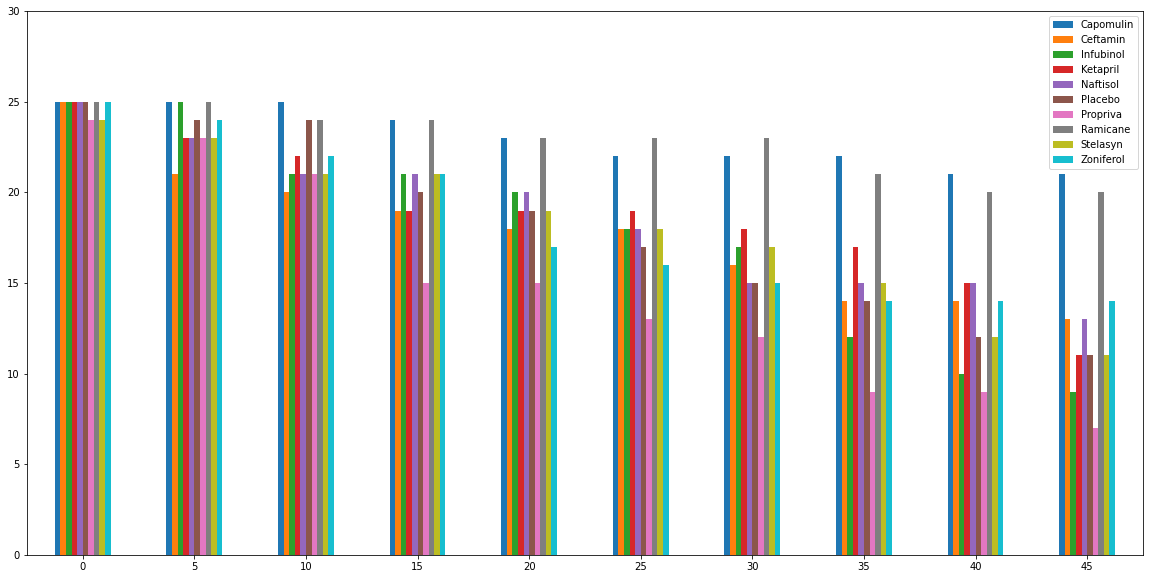

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
lab_bar_df_plot = newdrug_df[['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
             'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']].plot(kind='bar', figsize=(20,10))

lab_bar_df_plot.set_xticklabels(newdrug_df['Time Point'],rotation=360)

plt.ylim(0,30)
plt.show()
plt.tight_layout()


# delete 

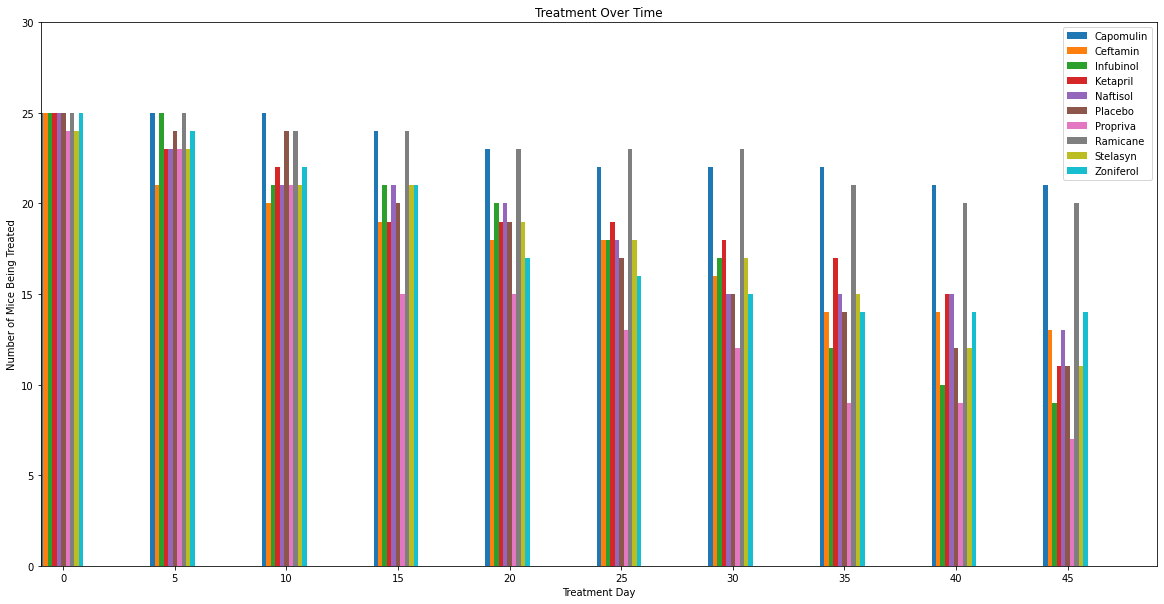

<Figure size 432x288 with 0 Axes>

In [44]:
# Generate a bar plot showing the total number of mice for each treatment 
#throughout the course of the study using pyplot.

#List of Drugs for labels
#['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol','Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']


# fix the chart size


#Setting x axis range
x = np.arange(0,50, 5)
#setting width of bar
width =0.2
#setting figure size 
plt.figure(figsize=(20,10))
#setting the x and y limits 
plt.xlim(0,50)
plt.ylim(0,30)
#plotting data for drugs 
plt.bar(x, cap_data, width=width, label='Capomulin')
plt.bar(x + width, cef_data, width=width, label='Ceftamin')
plt.bar(x + width*2, inf_data, width=width, label='Infubinol')
plt.bar(x + width*3, ket_data, width=width, label = 'Ketapril')
plt.bar(x + width*4, naf_data, width=width, label = 'Naftisol')
plt.bar(x + width*5, pla_data, width=width, label = 'Placebo')
plt.bar(x + width*6, pro_data, width=width, label = 'Propriva')
plt.bar(x + width*7, ram_data, width=width, label = 'Ramicane')
plt.bar(x + width*8, ste_data, width=width, label = 'Stelasyn')
plt.bar(x + width*9, zon_data, width=width, label = 'Zoniferol')

# Labeling graph
plt.xlabel('Treatment Day')
plt.ylabel('Number of Mice Being Treated')
plt.title('Treatment Over Time')

#center the lables on x axis
plt.xticks(x + width*5,timepoint)
plt.legend(loc = 'upper right',fontsize = 10)

#Showing bar chart adjusting layout
plt.show()
plt.tight_layout()





In [19]:
 # grouping data to get get smaller df by time point and drug regimen
lab_pie_df = mergedlab_df[['Sex','Mouse ID']].groupby(['Mouse ID','Sex']).count()


# #Changing the index from gender to number
lab_pie_df.reset_index(drop=False, inplace=True)

#getting count of male and females
pie_df = lab_pie_df['Sex'].value_counts()

#changing results to df
pie_df = pie_df.to_frame()

#chaging index from sex to number 
pie_df.reset_index(drop=False, inplace=True)

#renaming columns
pie_df.columns=['Sex','Sex Cnt']

#adding calc column for percentage
pie_df['Per Distribution Sex'] = round((pie_df['Sex Cnt']/pie_df['Sex Cnt'].sum())*100,2)

pie_df



,Sex,Sex Cnt,Per Distribution Sex
0,Male,125,50.4
1,Female,123,49.6


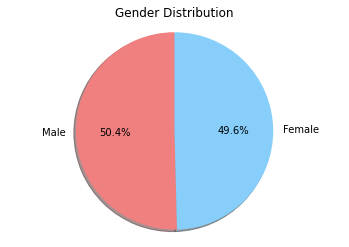

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


gender = ['Male', 'Female']
gencount = list(pie_df['Sex Cnt'])
colors = ['lightcoral', 'lightskyblue']
explode = (0,0)

plt.title('Gender Distribution')
plt.pie(gencount, explode=explode, labels=gender, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()



## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Propriva (top 2 and bottom 2)

# Start by getting the last (greatest) timepoint for each mouse
last_tp_df = mergedlab_df[mergedlab_df['Timepoint'] == 45]

#getting list of indexes for all rows associated with target drug regimens
indexes_of_cap_mouses = last_tp_df[last_tp_df['Drug Regimen'] == 'Capomulin'].index
indexes_of_ram_mouses = last_tp_df[last_tp_df['Drug Regimen'] == 'Ramicane'].index
indexes_of_inf_mouses = last_tp_df[last_tp_df['Drug Regimen'] == 'Infubinol'].index
indexes_of_cef_mouses = last_tp_df[last_tp_df['Drug Regimen'] == 'Propriva'].index

#creating new list to hold all 4 list of indexes + looping through all for list to combine
result =[]
for i in indexes_of_cap_mouses:
    result.append(i)

for i in indexes_of_ram_mouses:
    result.append(i)

for i in indexes_of_inf_mouses:
    result.append(i)

for i in indexes_of_cef_mouses:
    result.append(i)

#New df filtered by Capomulin, Ramicane, Infubinol, and Ceftamin
tdr_df = pd.DataFrame(last_tp_df, index= result)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#filtered original df by last day then target drug regimen there was no need to merge atthis point
tdr_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2


In [41]:
# Put treatments into a list for for loop (and later for plot labels)
target_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Propriva']

# Create empty list to fill with tumor vol data (for plotting)
# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_vol = tdr_df['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_vol.quantile([.25,.5,.75])
lowerqt = quartiles[0.25]
upperqt = quartiles[0.75]
iqr = upperqt-lowerqt

#Printing lowerqt, upperqt, iqr and median
print(f'The lower quartile of tumor volume is:{round(lowerqt,2)}')
print(f'The upper quartile of tumor volume is:{round(upperqt,2)}')
print(f'The interquartile range of tumor volume is:{round(iqr,2)}')
print(f'The median of tumor volume is:{round(quartiles[0.5],2)}')

# Determine outliers using upper and lower bounds
#calculating outliers
lower_bound = lowerqt -(1.5*iqr)
upper_bound = upperqt +(1.5*iqr)

#printing outlier values
print(f'Values below {round(lower_bound,2)} could be outliers')
print(f'Values above {round(upper_bound,2)} could be outliers')

#checking data set to find if outliers exist + printing
print(f'Smallest tumor volume is {round(tumor_vol.min(),2)}')
print(f'Biggest tumor volume is {round(tumor_vol.max(),2)}')
print('No Statistical outliers for tumor volumes exist in this data set')
    
     
    
    
    
    

The lower quartile of tumor volume is:33.33
The upper quartile of tumor volume is:60.92
The interquartile range of tumor volume is:27.59
The median of tumor volume is:38.85
Values below -8.06 could be outliers
Values above 102.3 could be outliers
Smallest tumor volume is 22.05
Biggest tumor volume is 72.46
No Statistical outliers for tumor volumes exist in this data set


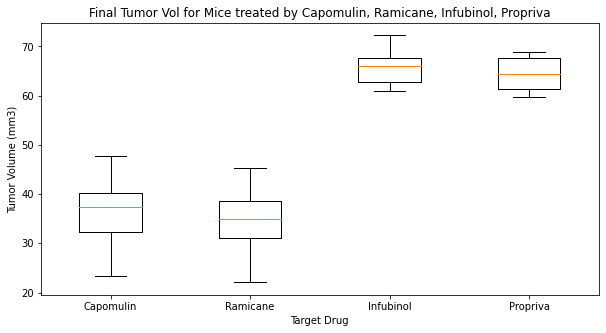

In [48]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#filtering df to seperate by drug
cap_box_df = tdr_df[tdr_df['Drug Regimen'] == 'Capomulin']
ram_box_df = tdr_df[tdr_df['Drug Regimen'] == 'Ramicane']
inf_box_df = tdr_df[tdr_df['Drug Regimen'] == 'Infubinol']
pro_box_df = tdr_df[tdr_df['Drug Regimen'] == 'Propriva']

#creating data set for the different box plots
cap_box = cap_box_df['Tumor Volume (mm3)']
ram_box = ram_box_df['Tumor Volume (mm3)']
inf_box = inf_box_df['Tumor Volume (mm3)']
pro_box = cef_box_df['Tumor Volume (mm3)']


 #adding data to list + calling sub plot + plotting box plot
data = [cap_box, ram_box, inf_box, pro_box]
fig, ax = plt.subplots(figsize=(10, 5))
ax.boxplot(data)

#setting title and labels
ax.set_title('Final Tumor Vol for Mice treated by Capomulin, Ramicane, Infubinol, Propriva')
ax.set_xlabel('Target Drug')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Propriva'])
#plt.subplots_adjust(wspace=0.2,hspace=0.2)

#showing chart
plt.show()





## Line and Scatter Plots

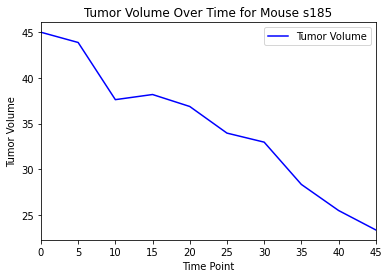

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#filter df by the target drug capomulin
cap_flt_df = mergedlab_df[mergedlab_df['Drug Regimen'] == 'Capomulin']

#slected mouse id: s185

#filter df by the target mouse id s185
s185_df = mergedlab_df[mergedlab_df['Mouse ID'] == 's185']


#plotting line of tumor volume over the differnt time points
s185_line1 = plt.plot(timepoint,s185_df['Tumor Volume (mm3)'],color='blue', label='Tumor Volume')


#Adjusting x axis
plt.xlim(0,45)


#Adding Labels to axis + title
plt.title('Tumor Volume Over Time for Mouse s185')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume')

#Showing legend
plt.legend()

#show chart
plt.show()


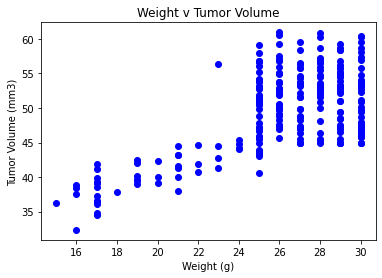

In [45]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#creating a smaller df to filter down and group to get avg tumor vol
scat_df = mergedlab_df[['Mouse ID','Weight (g)', 'Tumor Volume (mm3)']].groupby('Mouse ID').mean()

#setting up x and y data
x = scat_df['Weight (g)']
y = scat_df['Tumor Volume (mm3)']

#adjusting x and y labels + title 
plt.title('Weight v Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

#plotting scatter plot
plt.scatter(x, y, marker='o',color='blue')

#show chart
plt.show()




## Correlation and Regression

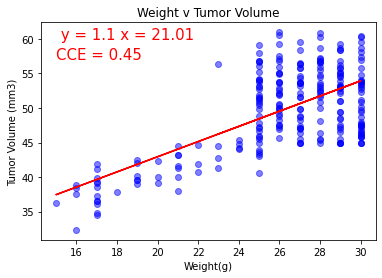

In [47]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#setting up x and y data
x = scat_df['Weight (g)']
y = scat_df['Tumor Volume (mm3)']

#Calculating regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)

#Calc regression line to plot on chart
regress_values = x * slope + intercept
line_eq = f' y = {round(slope,2)} x = {round(intercept,2)}' 


#plotting scatter plot + regression line + adding annotation to chart
plt.scatter(x, y, marker='o',color='blue', alpha=.5)
plt.plot(x, regress_values, 'red')
plt.annotate(line_eq,(15,60),fontsize=15,color="red")

#Calculating the correlation coefficient + adding annotation to chart
cc = st.spearmanr(x, y)
CCE = f'CCE = {round(cc.correlation,2)}' 
plt.annotate(CCE,(15,57),fontsize=15,color="red")

#adjusting x and y labels + title 
plt.title('Weight v Tumor Volume')
plt.xlabel('Weight(g)')
plt.ylabel('Tumor Volume (mm3)')



#show chart
plt.show()